# Exploratory data analysis

In [53]:
# Imports
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [7]:
# Creating data frame
clean_house_df = pd.read_csv("london_house_price_data_clean.csv")
clean_house_df.head()


,fullAddress,postcode,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,...,saleEstimate_lowerPrice,saleEstimate_currentPrice,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price
0,"Flat 35, Octavia House, Medway Street, London,...",SW1P 2TA,SW1P,51.495505,-0.132379,2.0,2.0,71.0,1.0,Leasehold,...,683000.0,759000.0,834000.0,MEDIUM,2025-01-10T11:04:57.114Z,49000.0,6.901408,2019-09-04,1995-01-03,249950
1,"24 Chester Court, Lomond Grove, London, SE5 7HS",SE5 7HS,SE5,51.478185,-0.092201,1.0,1.0,64.0,1.0,Leasehold,...,368000.0,388000.0,407000.0,HIGH,2024-10-07T13:26:59.894Z,28000.0,7.777778,2024-01-25,1995-01-03,32000
2,"18 Alexandra Gardens, London, N10 3RL",N10 3RL,N10,51.588774,-0.139599,1.0,4.0,137.0,2.0,Freehold,...,1198000.0,1261000.0,1324000.0,HIGH,2024-10-07T13:26:59.894Z,81000.0,6.864407,2022-12-14,1995-01-03,133000
3,"17 Collins Street, London, SE3 0UG",SE3 0UG,SE3,51.466089,0.006967,1.0,2.0,97.0,1.0,Freehold,...,897000.0,944000.0,991000.0,HIGH,2024-10-07T13:26:59.894Z,119000.0,14.424242,2021-09-30,1995-01-03,128500
4,"14 Theodore Road, London, SE13 6HT",SE13 6HT,SE13,51.451327,-0.007569,1.0,3.0,135.0,2.0,Freehold,...,690000.0,726000.0,762000.0,HIGH,2024-10-07T13:26:59.894Z,71000.0,10.839695,2021-12-06,1995-01-03,75000


## Univariate plots 

### Distribution of target variable 

In [48]:
# Viewing descriptive statistics
print(f"The minimum is {clean_house_df['saleEstimate_currentPrice'].min()}")
print(f"The maximum is {clean_house_df['saleEstimate_currentPrice'].max()}")
print(f"The mean is {clean_house_df['saleEstimate_currentPrice'].mean()}")
print(f"The median is {clean_house_df['saleEstimate_currentPrice'].median()}")
print(f"The standard deviation is {clean_house_df['saleEstimate_currentPrice'].std()}")

The minimum is 89000.0
The maximum is 17844000.0
The mean is 867979.865443701
The median is 619000.0
The standard deviation is 804371.6298535006


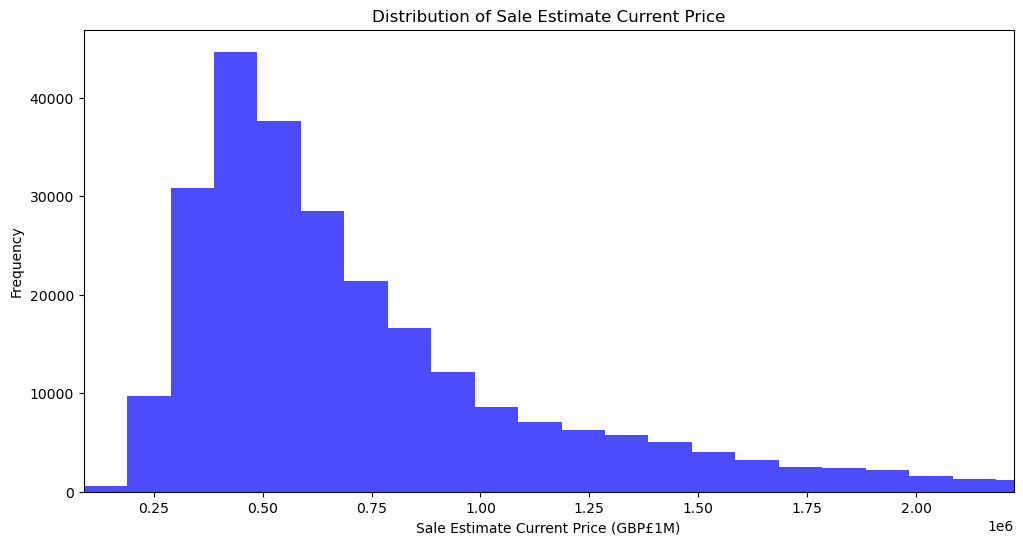

In [51]:

# Plotting the histogram for the 'saleEstimate_currentPrice' column
plt.figure(figsize=(12, 6))
plt.hist(clean_house_df['saleEstimate_currentPrice'], bins=178, color='blue', alpha=0.7)
plt.title('Distribution of Sale Estimate Current Price')
plt.xlabel('Sale Estimate Current Price (GBP£1M)')
plt.ylabel('Frequency')

# Set x-axis limits - Adjusting to 0.95 to narrow focus
plt.xlim([clean_house_df['saleEstimate_currentPrice'].min(), clean_house_df['saleEstimate_currentPrice'].quantile(0.95)]) 

# Save the figure
plt.savefig('Sale_Estimate_Current_Price_Distribution.png', dpi=300, bbox_inches='tight')

plt.show()


**Observations and analysis**

Key Insight and Takeaway: 

The distribution of Sale Estimate Current Price in the real estate market highlights a larger concentration of properties at moderate price points with a smaller fraction of luxury, high-cost properties, emphasizing a market rich in mid-range properties but also skewed by premium listings.

The Distribution Type/Shape: 

The histogram displays a long right tailed distribution, which typically indicates that while the bulk of property prices are clustered towards the lower end (more affordable range), there are enough high-value properties to skew the average price upwards. This shape suggests that the high-end market, though smaller in volume, significantly influences the overall pricing landscape.

Mean, Median, Standard Deviation, and What They Tell Us:

- Mean (£868K): Higher than the median, influenced by plentiful high-value edge cases, indicating that while some properties are priced significantly higher, they are not the norm but still affect the average price.

- Median (£619K): Represents the middle value of the dataset, providing a better indicator of typical market prices unaffected by extreme values, thus reflecting the more common sales price encountered in the market.

- Standard Deviation (£804K): The large value suggests a wide range of property prices, indicating high variability within the market. Properties vary greatly in price, pointing to a diverse market that can accommodate various buyer types, from budget-conscious to high-end buyers.









## Bivariate Plots

### Number of bathrooms against target variable

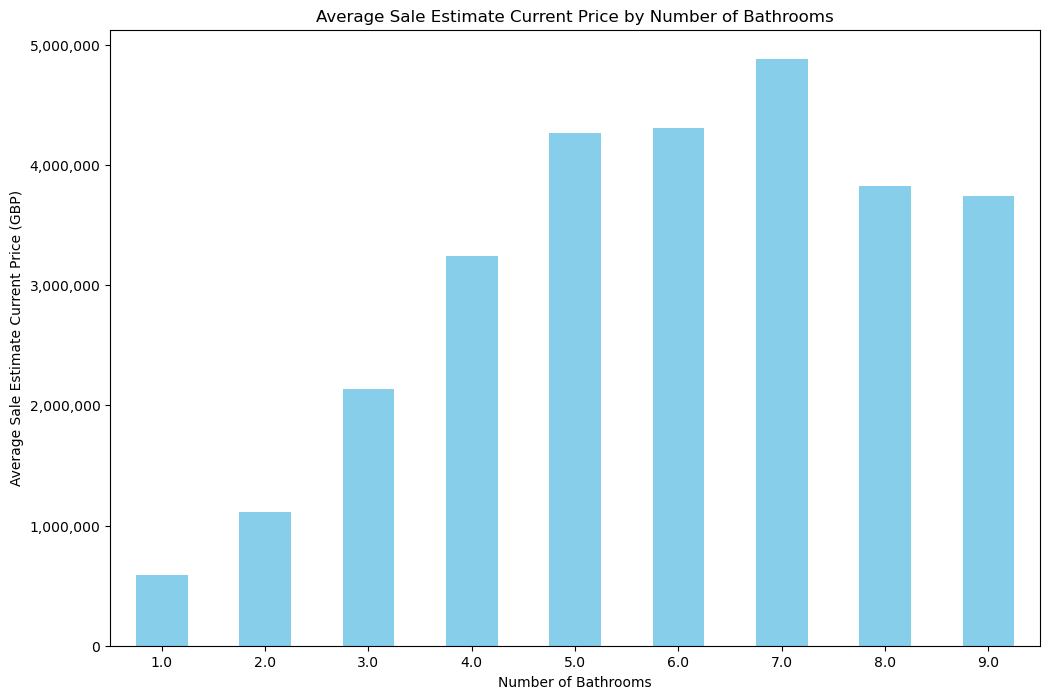

In [ ]:
# Calculating mean saleEstimate_currentPrice for each number of bathrooms
mean_prices = clean_house_df.groupby('bathrooms')['saleEstimate_currentPrice'].mean()

# Plotting bar chart
plt.figure(figsize=(12, 8)) 
mean_prices.plot(kind='bar', color='skyblue')  
plt.title('Average Sale Estimate Current Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Sale Estimate Current Price (GBP)')
plt.xticks(rotation=0)

# Formatting the y-axis to show labels as currency -- Adapted code from URL: https://stackoverflow.com/questions/25973581/how-to-format-axis-number-format-to-thousands-with-a-comma
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))  # Adds commas to the y-axis labels

# Save the figure
plt.savefig('Sale_Estimate_Current_Price_by Number_of_Bathrooms.png', dpi=300, bbox_inches='tight')

plt.show()


### Floor area against target variable

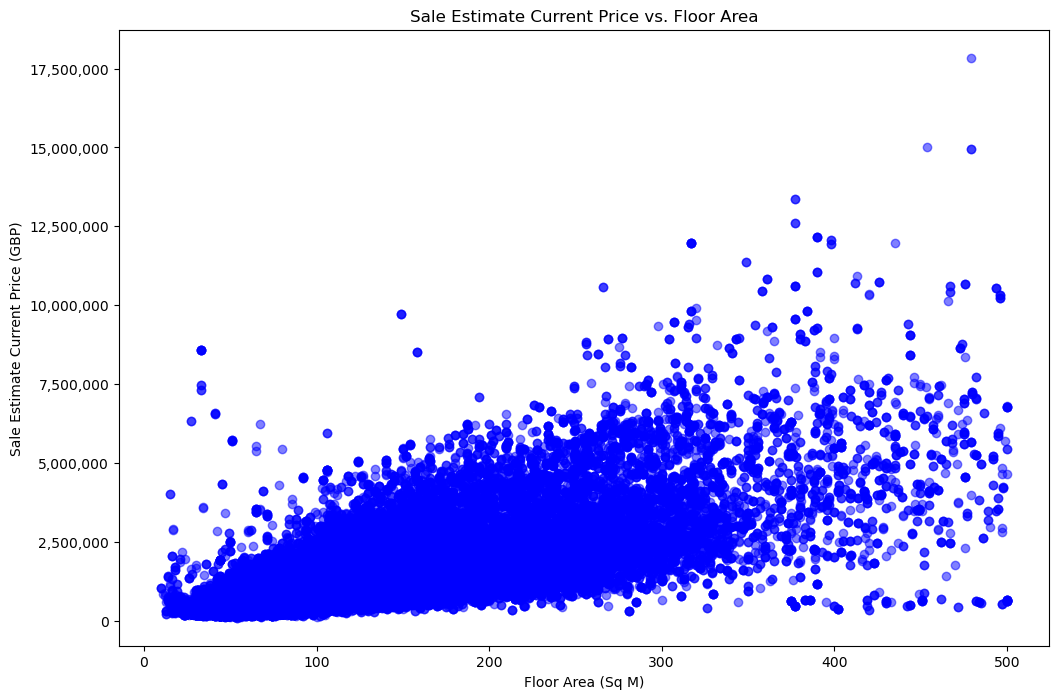

In [ ]:
# Plotting the scatter plot 
plt.figure(figsize=(12, 8)) 
plt.scatter(clean_house_df['floorAreaSqM'], clean_house_df['saleEstimate_currentPrice'], alpha=0.5, color='blue')
plt.title('Sale Estimate Current Price vs. Floor Area')
plt.xlabel('Floor Area (Sq M)')
plt.ylabel('Sale Estimate Current Price (GBP)')

# Formatting y-axis
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))  

# Save the figure
plt.savefig('Sale_Estimate_Current_Price_by_Floor_Area.png', dpi=300, bbox_inches='tight')

plt.show()
